### Load libraries

In [1]:

from cobra.flux_analysis import flux_variability_analysis
#from cobra.io import read_sbml_model
import cobra
import numpy as np
import networkx as nx
from dingo.illustrations import plot_graph
from cobra.flux_analysis.loopless import loopless_solution
import pickle
from dingo import MetabolicNetwork

import matplotlib.pyplot as plt
import pandas as pd



from utils import load_model, get_objective_functions, fva_dictionary, get_reaction_bounds
from utils import modify_model, sampling_statistics, sample_dingo, sample_optgp
from utils import get_loopless_solutions_from_samples, calculate_affected_samples, plot_grid_95_reactions, set_bounds_from_loopless_solution_samples

/home/touliopoulos/.local/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/touliopoulos/.local/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


### Load initial model and extract information

In [2]:
ec_cobra_model, ec_cobra_reactions, ec_dingo_model, ec_dingo_reactions = load_model("/home/touliopoulos/project/erasmus/erasmus_2025_project/ext_data/models/e_coli_core.xml")

objective_functions = get_objective_functions(ec_cobra_model)
print(objective_functions)

default_reaction_bounds = get_reaction_bounds(ec_cobra_model)
print(default_reaction_bounds)


Set parameter Username
Set parameter LicenseID to value 2642044
Academic license - for non-commercial use only - expires 2026-03-25
['BIOMASS_Ecoli_core_w_GAM']
{'PFK': (0.0, 1000.0), 'PFL': (0.0, 1000.0), 'PGI': (-1000.0, 1000.0), 'PGK': (-1000.0, 1000.0), 'PGL': (0.0, 1000.0), 'ACALD': (-1000.0, 1000.0), 'AKGt2r': (-1000.0, 1000.0), 'PGM': (-1000.0, 1000.0), 'PIt2r': (-1000.0, 1000.0), 'ALCD2x': (-1000.0, 1000.0), 'ACALDt': (-1000.0, 1000.0), 'ACKr': (-1000.0, 1000.0), 'PPC': (0.0, 1000.0), 'ACONTa': (-1000.0, 1000.0), 'ACONTb': (-1000.0, 1000.0), 'ATPM': (8.39, 1000.0), 'PPCK': (0.0, 1000.0), 'ACt2r': (-1000.0, 1000.0), 'PPS': (0.0, 1000.0), 'ADK1': (-1000.0, 1000.0), 'AKGDH': (0.0, 1000.0), 'ATPS4r': (-1000.0, 1000.0), 'PTAr': (-1000.0, 1000.0), 'PYK': (0.0, 1000.0), 'BIOMASS_Ecoli_core_w_GAM': (0.0, 1000.0), 'PYRt2': (-1000.0, 1000.0), 'CO2t': (-1000.0, 1000.0), 'RPE': (-1000.0, 1000.0), 'CS': (0.0, 1000.0), 'RPI': (-1000.0, 1000.0), 'SUCCt2_2': (0.0, 1000.0), 'CYTBD': (0.0, 1000.

### Perform default and loopless FVA and constraint the model

In [ ]:
# Perform flux variability analysis
fva_dict = fva_dictionary(ec_cobra_model, optimal_percentage = 70, loopless = False)
fva_loopless_dict = fva_dictionary(ec_cobra_model, optimal_percentage = 70, loopless = True)

print(fva_dict['FRD7'])
print(fva_loopless_dict['FRD7'])


modified_reaction_bounds = default_reaction_bounds.copy()
modified_reaction_bounds['FRD7'] = fva_loopless_dict['FRD7']

ec_cobra_model_loopless_fva_FRD7, ec_dingo_model_loopless_fva_FRD7 = modify_model(ec_cobra_model, objective_function="BIOMASS_Ecoli_core_w_GAM", optimal_percentage=70, reaction_bounds=modified_reaction_bounds)


(0.0, 1000.0)
(0.0, 0.0)


### Generate samples

In [3]:

ec_cobra_model_biomass_obj_0_opt, ec_dingo_model_biomass_obj_0_opt = modify_model(ec_cobra_model, objective_function="BIOMASS_Ecoli_core_w_GAM", optimal_percentage=0)
ec_cobra_model_biomass_obj_99_opt, ec_dingo_model_biomass_obj_99_opt = modify_model(ec_cobra_model, objective_function="BIOMASS_Ecoli_core_w_GAM", optimal_percentage=99)
ec_cobra_model_biomass_obj_100_opt, ec_dingo_model_biomass_obj_100_opt = modify_model(ec_cobra_model, objective_function="BIOMASS_Ecoli_core_w_GAM", optimal_percentage=100)


samples_dingo_biomass_obj_0_opt = sample_dingo(ec_dingo_model_biomass_obj_0_opt, reaction_in_rows = True, ess=2000)
print(samples_dingo_biomass_obj_0_opt.shape)

samples_dingo_biomass_obj_99_opt = sample_dingo(ec_dingo_model_biomass_obj_99_opt, reaction_in_rows = True, ess=2000)
print(samples_dingo_biomass_obj_99_opt.shape)

samples_dingo_biomass_obj_100_opt = sample_dingo(ec_dingo_model_biomass_obj_100_opt, reaction_in_rows = True, ess=2000)
print(samples_dingo_biomass_obj_100_opt.shape)


samples_optgp_biomass_obj_0_opt = sample_optgp(ec_cobra_model_biomass_obj_0_opt, n_samples = samples_dingo_biomass_obj_0_opt.shape[1], reaction_in_rows = True)
samples_optgp_biomass_obj_99_opt = sample_optgp(ec_cobra_model_biomass_obj_99_opt, n_samples = samples_dingo_biomass_obj_99_opt.shape[1], reaction_in_rows = True)
samples_optgp_biomass_obj_100_opt = sample_optgp(ec_cobra_model_biomass_obj_100_opt, n_samples = samples_dingo_biomass_obj_100_opt.shape[1], reaction_in_rows = True)



Read LP format model from file /tmp/tmpfx6j5axj.lp
Reading time = 0.01 seconds
: 72 rows, 190 columns, 720 nonzeros
Read LP format model from file /tmp/tmpr2js11vj.lp
Reading time = 0.00 seconds
: 72 rows, 190 columns, 720 nonzeros
Read LP format model from file /tmp/tmppe6na6h5.lp
Reading time = 0.00 seconds
: 72 rows, 190 columns, 720 nonzeros
Set parameter Username
Set parameter LicenseID to value 2642044
Academic license - for non-commercial use only - expires 2026-03-25
phase 1: number of correlated samples = 500, effective sample size = 8, ratio of the maximum singilar value over the minimum singular value = 976.221
phase 2: number of correlated samples = 500, effective sample size = 51, ratio of the maximum singilar value over the minimum singular value = 2.17626
phase 3: number of correlated samples = 2400, effective sample size = 946
phase 4: number of correlated samples = 2400, effective sample size = 942
phase 5: number of correlated samples = 300, effective sample size = 88

[5]maximum marginal PSRF: 1.00157


phase 1: number of correlated samples = 500, effective sample size = 6, ratio of the maximum singilar value over the minimum singular value = 1881.69
phase 2: number of correlated samples = 500, effective sample size = 66, ratio of the maximum singilar value over the minimum singular value = 43.6951
phase 3: number of correlated samples = 500, effective sample size = 99, ratio of the maximum singilar value over the minimum singular value = 2.68126
phase 4: number of correlated samples = 2400, effective sample size = 1071
phase 5: number of correlated samples = 2000, effective sample size = 884
[5]total ess 2126: number of correlated samples = 5900


(95, 5900)


[5]maximum marginal PSRF: 1.01441


phase 1: number of correlated samples = 500, effective sample size = 5, ratio of the maximum singilar value over the minimum singular value = 1148.64
phase 2: number of correlated samples = 500, effective sample size = 5, ratio of the maximum singilar value over the minimum singular value = 351.161
phase 3: number of correlated samples = 500, effective sample size = 4, ratio of the maximum singilar value over the minimum singular value = 191.648
phase 4: number of correlated samples = 500, effective sample size = 126, ratio of the maximum singilar value over the minimum singular value = 30.746
phase 5: number of correlated samples = 500, effective sample size = 176, ratio of the maximum singilar value over the minimum singular value = 3.03872
phase 6: number of correlated samples = 500, effective sample size = 160, ratio of the maximum singilar value over the minimum singular value = 3.44769
phase 7: number of correlated samples = 500, effective sample size = 173, ratio of the maximum 

[5]maximum marginal PSRF: 1.10657


Read LP format model from file /tmp/tmpjiu1z5j5.lp
Reading time = 0.00 seconds
: 72 rows, 190 columns, 720 nonzeros
Read LP format model from file /tmp/tmp1vcai2lg.lp
Reading time = 0.00 seconds
: 72 rows, 190 columns, 720 nonzeros


RuntimeError: Cannot escape sampling region, model seems to be numerically unstable. Reporting the model to https://github.com/opencobra/cobrapy/issues will help us to fix this.

### Define samples to procceed

In [ ]:
samples_optgp_ec_model = samples_optgp_biomass_obj_0_opt

samples_dingo_ec_model = samples_dingo_biomass_obj_0_opt


### Plot the distribution of reactions fluxes

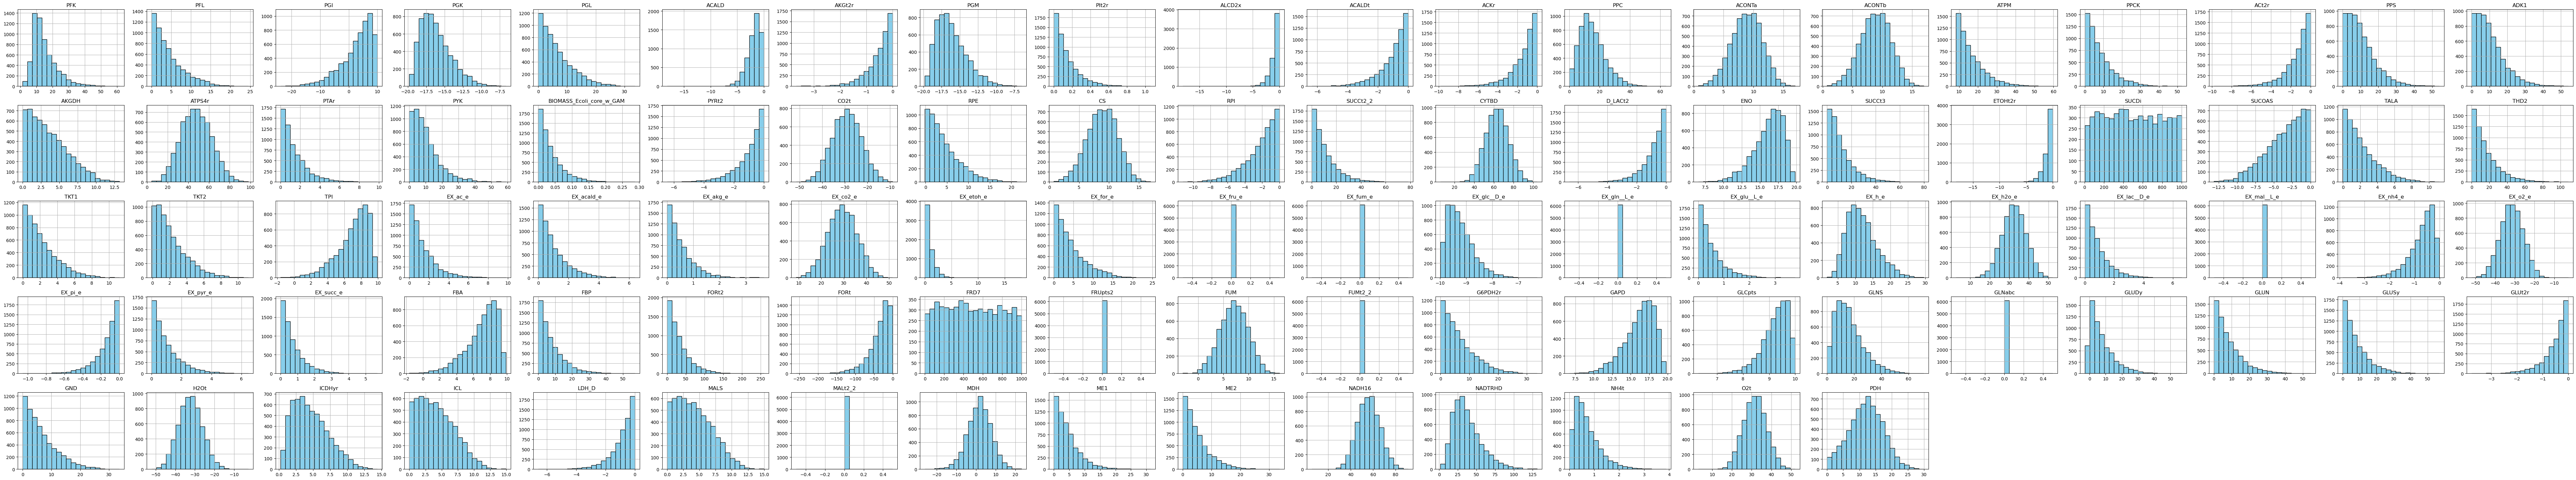

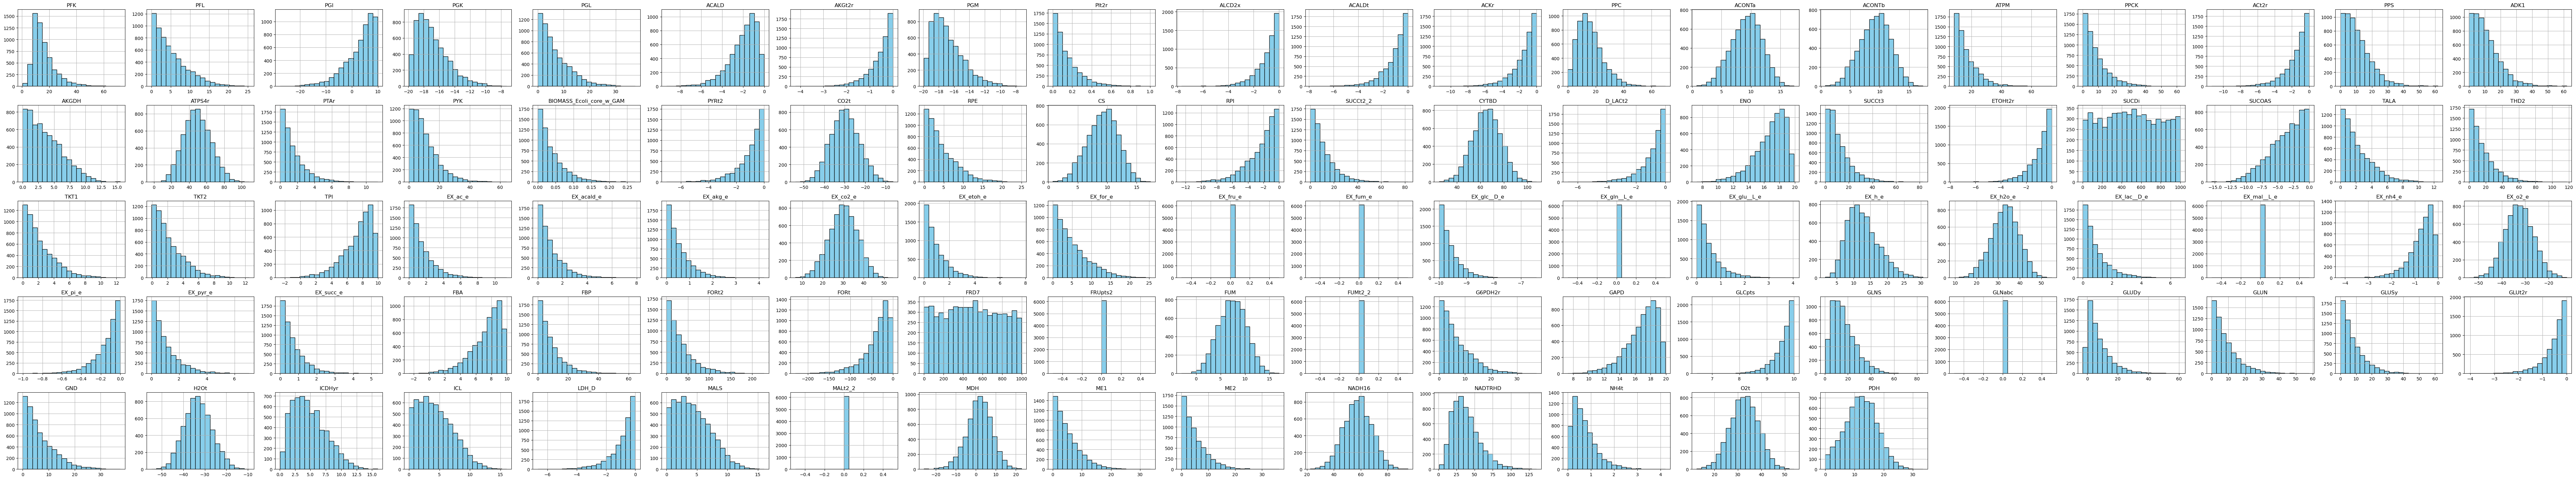

In [5]:

plot_grid_95_reactions(samples_optgp_ec_model, ec_cobra_model, nrows=5, ncols=20)
plot_grid_95_reactions(samples_dingo_ec_model, ec_cobra_model, nrows=5, ncols=20)


### Calculate statistics from samples

In [7]:

mean, min, max, std, skewness, kurtosis = sampling_statistics(samples_dingo_ec_model, reactions_ids_list=ec_dingo_reactions, reaction_id="FRD7")
print(mean, min, max, std, skewness, kurtosis)


mean, min, max, std, skewness, kurtosis = sampling_statistics(samples_optgp_ec_model, reactions_ids_list=ec_dingo_reactions, reaction_id="FRD7")
print(mean, min, max, std, skewness, kurtosis)


492.19194349563026 0.1964863817831088 998.2813606783299 284.9280140566338 0.01955913526605795 -1.1574257059309627
493.0506431377207 0.06057395757269246 999.0297453646722 285.59849588265627 0.039165000978234166 -1.1976317710683562


### Calculate the loopless solution and save to numpy 2D array

In [ ]:

samples_dingo_ec_model_loopless_solutions = get_loopless_solutions_from_samples(samples_dingo_ec_model, ec_cobra_model)

print(samples_dingo_ec_model.shape)
print(samples_dingo_ec_model_loopless_solutions.shape)


samples_optgp_ec_model_loopless_solutions = get_loopless_solutions_from_samples(samples_optgp_ec_model, ec_cobra_model)

print(samples_optgp_ec_model.shape)
print(samples_optgp_ec_model_loopless_solutions.shape)


/home/touliopoulos/.local/lib/python3.10/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


(95, 6100)
(95, 6100)
(95, 6102)
(95, 6102)


### Check how much a random sample (the 1st) was affected by loopless solution

In [ ]:
cobra_reactions_str = [str(reaction.id) for reaction in ec_cobra_model.reactions]
reactions_ranges = {cobra_reactions_str[i]: samples_dingo_ec_model[:, i].max() - samples_dingo_ec_model_loopless_solutions[:, i].min() for i in range(samples_dingo_ec_model.shape[0])}

# Check for 1st samples on default samples
df = pd.DataFrame({
    'value_1': samples_dingo_ec_model_loopless_solutions.T[0],
    'value_2': samples_dingo_ec_model.T[0],
    'difference': abs(samples_dingo_ec_model_loopless_solutions.T[0] - samples_dingo_ec_model.T[0])
})
df['norm_difference'] = df['difference'] / list(reactions_ranges.values())

df_filtered = df[df['difference'] > 0.1]
print("Filtered df of reactions with differences:\n" , df_filtered, df_filtered.shape)

df_no_differences = df[df['difference'] < 0.1]
print("Filtered df of reactions with no differences:\n" , df_no_differences, df_no_differences.shape)


Filtered df of reactions with differences:
       value_1    value_2  difference  norm_difference
0    9.457324  10.796012    1.338688         0.016202
2    9.172857   8.455233    0.717624         0.002796
3  -19.028023 -18.788815    0.239208         0.001089
4    0.551440   1.269064    0.717624         0.003174
7  -18.870487 -18.631279    0.239208         0.001028
12   9.069940   4.069575    5.000365         0.021146
13   8.922711   8.683503    0.239208         0.001041
14   8.922711   8.683503    0.239208         0.001180
15  68.040566  15.079533   52.961033         0.324923
16   0.000000   0.455741    0.455741         0.003746
18   0.000000   3.336670    3.336670         0.022832
19   0.000000   3.336670    3.336670         0.029103
20   0.000000   1.492491    1.492491         0.012805
21  60.876513   9.509110   51.367403         0.474604
23   0.000000   8.553568    8.553568         0.056012
27   0.291933   0.770349    0.478416         0.003673
28   8.922711   8.683503    0.239208  

### Find which reactions from the default model have significant differences with themselves after applying loopless solution. 

This can be done by comparing their distributions (before and after). This may reveal reactions participating in loops

### Find how many samples (e.g. percentage) from a model constrained with loopless FVA solution have significant differences with themselves after applying loopless solution. 

This can be done by setting a tolerance value, e.g. tol = 0.01, that will reveal whether reactions from a sample have significant differences (greater than this value) with themselves after loopless solution. In addition, calculating distances between samples before and after loopless solution (for 3000 samples ==> 3000 distances) and calculation of the average and standard deviation of these (3000) distances will show the efficiency of the FVA approach. 

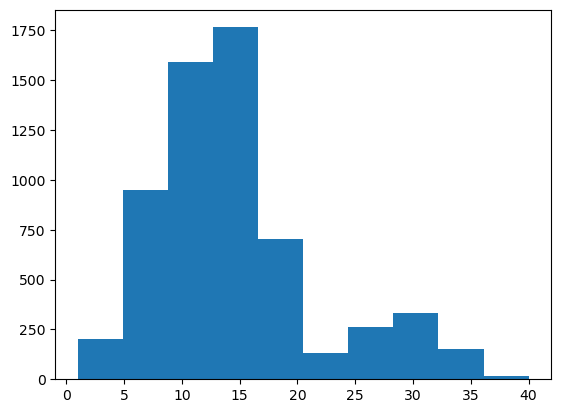

6100 affected samples out of (95, 6100) total samples


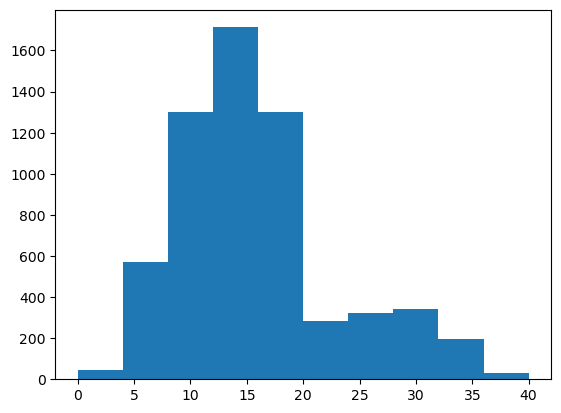

6101 affected samples out of (95, 6102) total samples


In [9]:

affected_reactions_count, total_affected_samples = calculate_affected_samples(samples_dingo_ec_model, 
                                                                              samples_dingo_ec_model_loopless_solutions, 
                                                                              ec_cobra_model, 
                                                                              tol_reaction_difference=0.2, 
                                                                              tol_reactions_count=1)

plt.hist(affected_reactions_count)
plt.show()
    
print(total_affected_samples, "affected samples out of", (samples_dingo_ec_model).shape, "total samples")



affected_reactions_count, total_affected_samples = calculate_affected_samples(samples_optgp_ec_model, 
                                                                              samples_optgp_ec_model_loopless_solutions, 
                                                                              ec_cobra_model, 
                                                                              tol_reaction_difference=0.2, 
                                                                              tol_reactions_count=1)

plt.hist(affected_reactions_count)
plt.show()
    
print(total_affected_samples, "affected samples out of", (samples_optgp_ec_model).shape, "total samples")


### Get the flux ranges from loopless solutions sampling and apply them as minimum and maximum reaction bounds

In [10]:

constrained_ec_cobra_model = set_bounds_from_loopless_solution_samples(samples_dingo_ec_model_loopless_solutions, ec_cobra_model)

# sample again with bounds constrained from loopless solutions
constrained_ec_dingo_model = MetabolicNetwork.from_cobra_model(constrained_ec_cobra_model)
samples_dingo_ec_model_constrained = sample_dingo(constrained_ec_dingo_model, reaction_in_rows = True, ess=2000)
print(samples_dingo_ec_model_constrained.shape)


samples_optgp_ec_model_constrained = sample_optgp(constrained_ec_cobra_model, n_samples = samples_dingo_ec_model_constrained.shape[1], reaction_in_rows = True)
print(samples_optgp_ec_model_constrained.shape)


Read LP format model from file /tmp/tmp89xw78_b.lp
Reading time = 0.00 seconds
: 72 rows, 190 columns, 720 nonzeros
phase 1: number of correlated samples = 400, effective sample size = 2, ratio of the maximum singilar value over the minimum singular value = 2277.43
phase 2: number of correlated samples = 400, effective sample size = 2, ratio of the maximum singilar value over the minimum singular value = 1475.27
phase 3: number of correlated samples = 400, effective sample size = 137, ratio of the maximum singilar value over the minimum singular value = 25.3604
phase 4: number of correlated samples = 400, effective sample size = 191, ratio of the maximum singilar value over the minimum singular value = 2.06641
phase 5: number of correlated samples = 1900, effective sample size = 912
phase 6: number of correlated samples = 1900, effective sample size = 764
[5]total ess 2008: number of correlated samples = 5400


(95, 5400)


[5]maximum marginal PSRF: 1.14704


Read LP format model from file /tmp/tmpi9pa02jf.lp
Reading time = 0.00 seconds
: 72 rows, 190 columns, 720 nonzeros
(95, 5400)


### Plot distributions of reactions: from samples of default model and model constrained with loopless solution bounds 

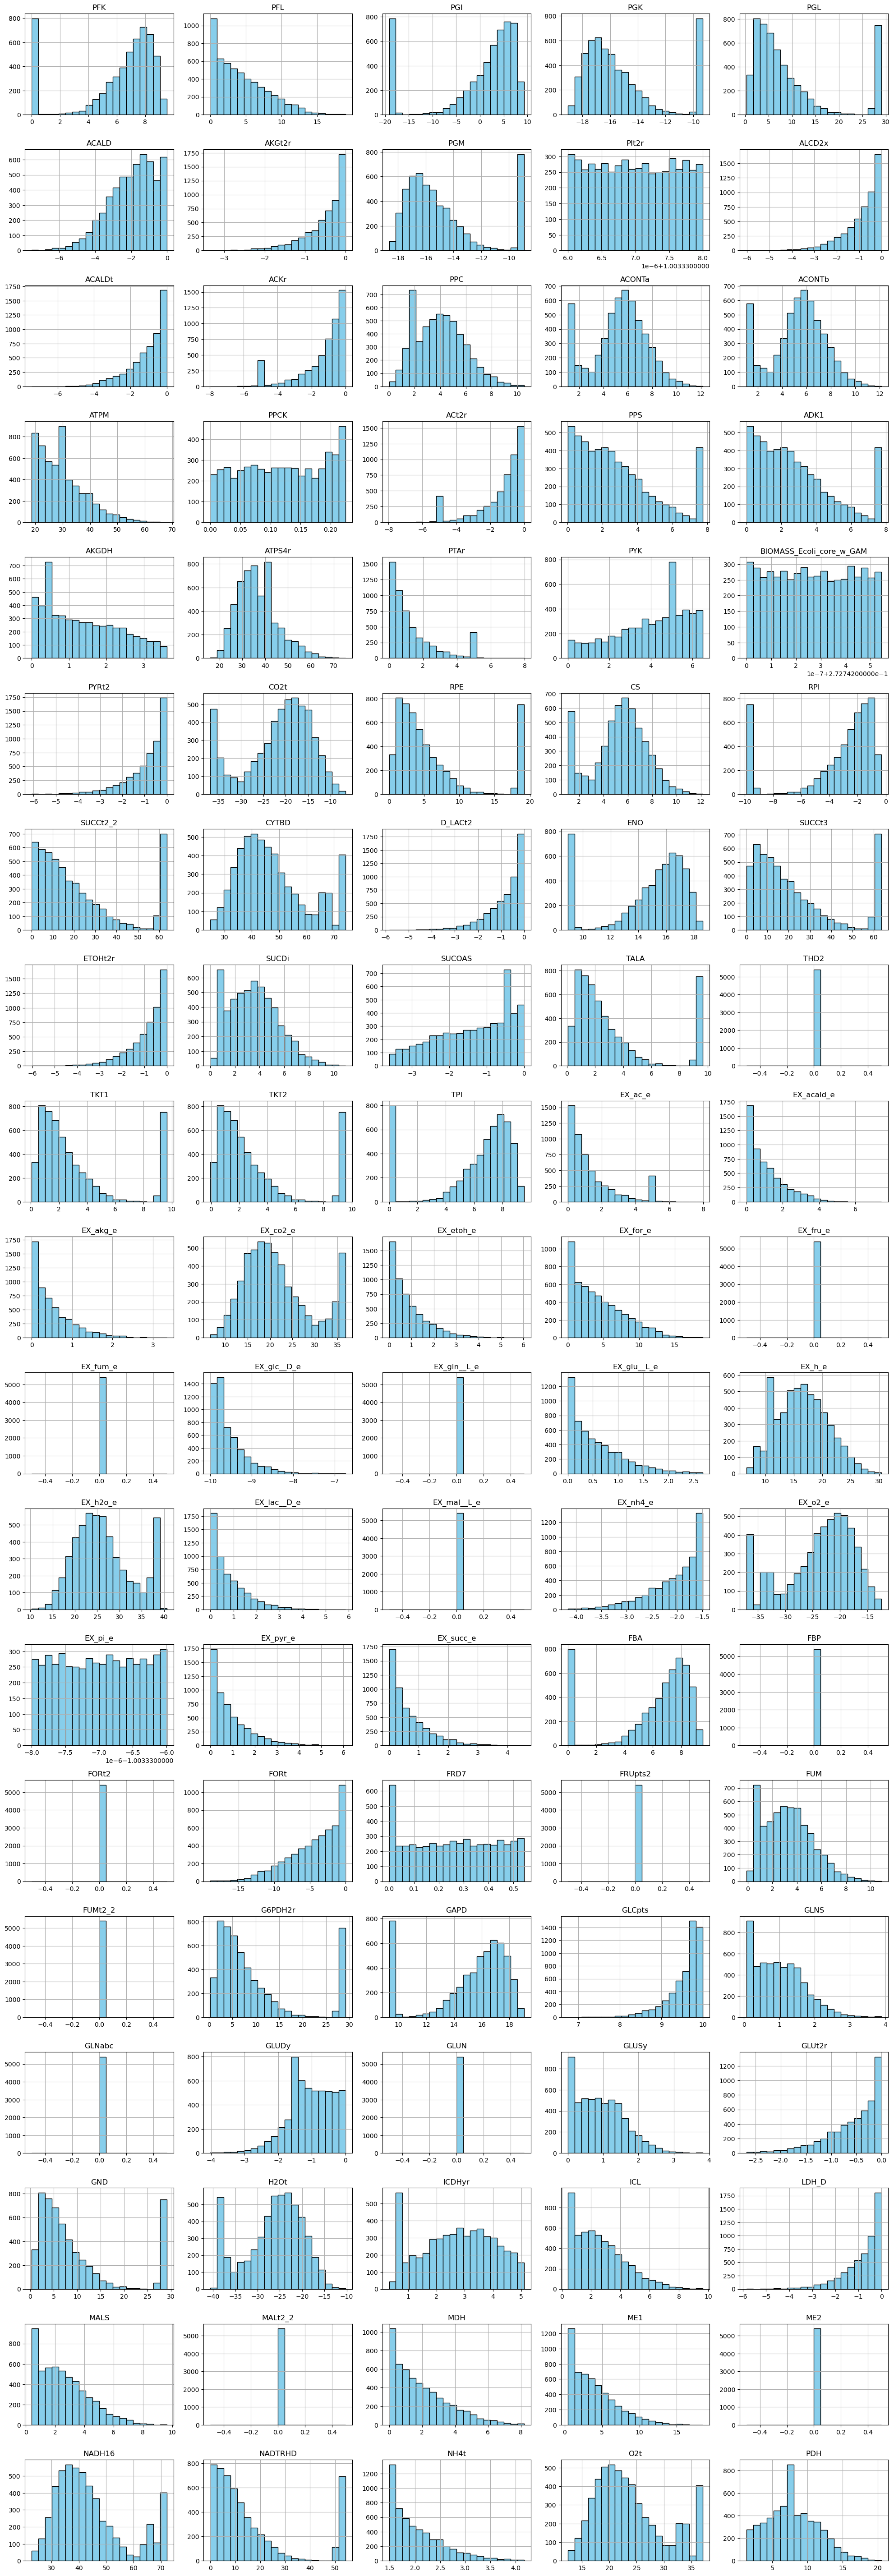

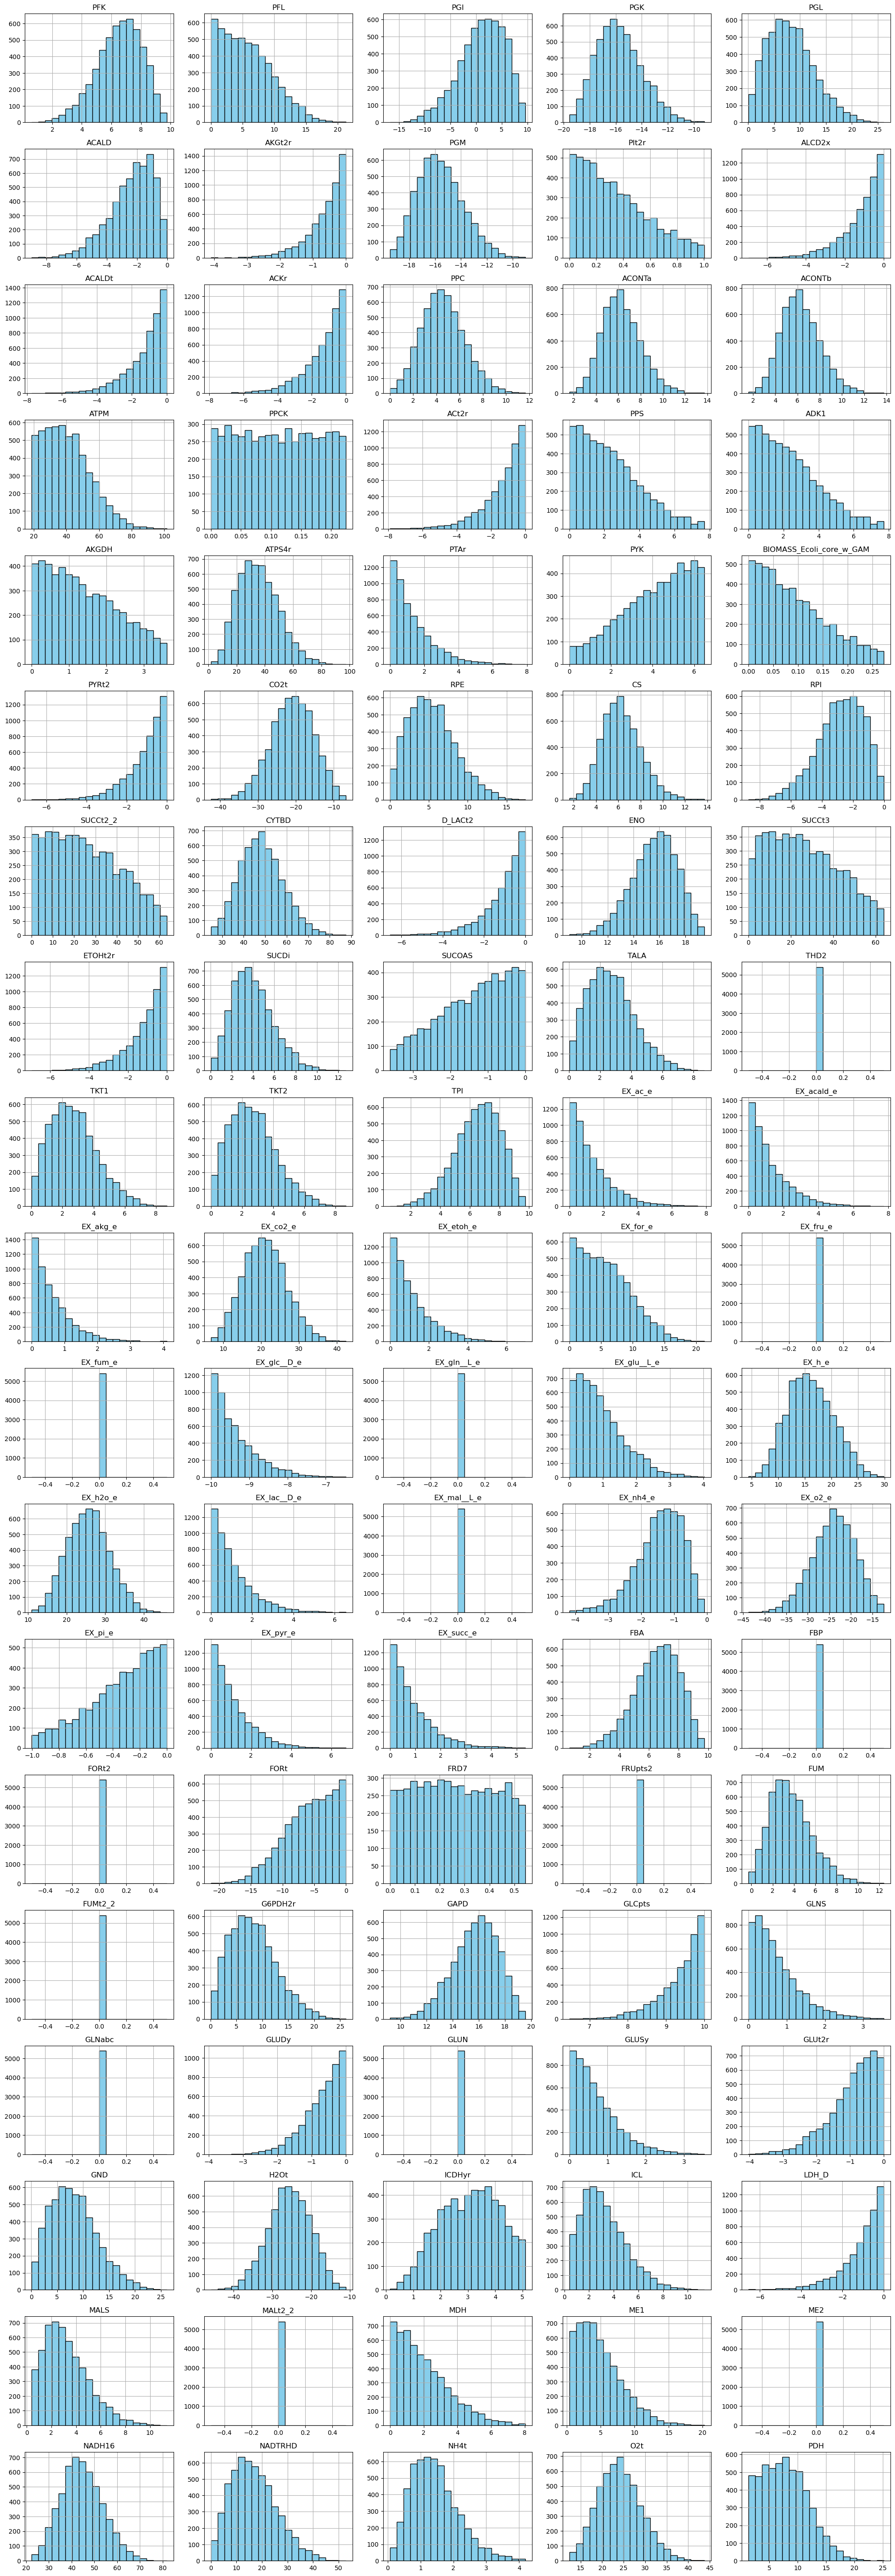

In [ ]:
#plot_grid_95_reactions(samples_dingo_ec_model, ec_cobra_model, nrows=20, ncols=5)
#plot_grid_95_reactions(samples_optgp_ec_model, ec_cobra_model, nrows=20, ncols=5)

#plot_grid_95_reactions(samples_dingo_ec_model_loopless_solutions, ec_cobra_model, nrows=20, ncols=5)
#plot_grid_95_reactions(samples_optgp_ec_model_loopless_solutions, ec_cobra_model, nrows=20, ncols=5)

plot_grid_95_reactions(samples_dingo_ec_model_constrained, ec_cobra_model, nrows=20, ncols=5)
plot_grid_95_reactions(samples_optgp_ec_model_constrained, ec_cobra_model, nrows=20, ncols=5)


### Visualize network with graphs

In [13]:

correlation_matrix_ec_model = np.corrcoef(samples_dingo_ec_model)
correlation_matrix_ec_model[np.isnan(correlation_matrix_ec_model)] = 0
print(correlation_matrix_ec_model.shape)

correlation_matrix_ec_model_loopless_solutions = np.corrcoef(samples_dingo_ec_model_loopless_solutions)
correlation_matrix_ec_model_loopless_solutions[np.isnan(correlation_matrix_ec_model_loopless_solutions)] = 0
print(correlation_matrix_ec_model_loopless_solutions.shape)

correlation_matrix_ec_model_constrained = np.corrcoef(samples_dingo_ec_model_constrained)
correlation_matrix_ec_model_constrained[np.isnan(correlation_matrix_ec_model_constrained)] = 0
print(correlation_matrix_ec_model_constrained.shape)


def graphs(correlation_matrix, reactions, correction=True):
       
    graph_matrix = correlation_matrix.copy()
    np.fill_diagonal(graph_matrix, 0)
    
    if correction == True:
        graph_matrix = abs(graph_matrix)
        
    G = nx.from_numpy_array(graph_matrix)
    G = nx.relabel_nodes(G, lambda x: reactions[x])
    
    pos = nx.spring_layout(G)
    unconnected_nodes = list(nx.isolates(G))
    print(unconnected_nodes)
    G.remove_nodes_from(unconnected_nodes)
    
    center_x = np.mean([p[0] for p in pos.values()])
    center_y = np.mean([p[1] for p in pos.values()])
    central_nodes = [node for node, (x, y) in pos.items() if abs(x - center_x) < 0.2 and abs(y - center_y) < 0.2]
    
    return G, pos, central_nodes
    


cobra_reactions_str = [str(reaction.id) for reaction in ec_cobra_reactions]



G_ec_model, layout_ec_model, central_nodes_ec_model  = graphs(correlation_matrix_ec_model,
                reactions = cobra_reactions_str,
                correction=True
                )
plot_graph(G_ec_model, layout_ec_model)

G_ec_model_loopless_solutions, layout_ec_model_loopless_solutions, central_nodes_ec_model_loopless_solutions  = graphs(correlation_matrix_ec_model_loopless_solutions,
                reactions = cobra_reactions_str,
                correction=True
                )
plot_graph(G_ec_model_loopless_solutions, layout_ec_model_loopless_solutions)

G_ec_model_constrained, layout_ec_model_constrained, central_nodes_ec_model_constrained  = graphs(correlation_matrix_ec_model_constrained,
                reactions = cobra_reactions_str,
                correction=True
                )
plot_graph(G_ec_model_constrained, layout_ec_model_constrained)


/home/touliopoulos/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning:

invalid value encountered in divide

/home/touliopoulos/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning:

invalid value encountered in divide



(95, 95)
(95, 95)
(95, 95)
['EX_fru_e', 'EX_fum_e', 'EX_gln__L_e', 'EX_mal__L_e', 'FRUpts2', 'FUMt2_2', 'GLNabc', 'MALt2_2']


['THD2', 'EX_fru_e', 'EX_fum_e', 'EX_gln__L_e', 'EX_mal__L_e', 'FBP', 'FORt2', 'FRUpts2', 'FUMt2_2', 'GLNabc', 'GLUN', 'MALt2_2', 'ME2']


['THD2', 'EX_fru_e', 'EX_fum_e', 'EX_gln__L_e', 'EX_mal__L_e', 'FBP', 'FORt2', 'FRUpts2', 'FUMt2_2', 'GLNabc', 'GLUN', 'MALt2_2', 'ME2']
